In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:

# Membaca dataset
dataset_path = 'wine+quality/c:\Users\LENOVO\AppData\Local\Packages\MicrosoftWindows.Client.CBS_cw5n1h2txyewy\TempState\ScreenClip\{02D33D5E-6614-4EAC-A51C-2EC761CBAB7F}.png'
data = pd.read_csv(dataset_path, sep=';')

# Mengambil 2000 data secara acak
sampled_data = data.sample(n=2000, random_state=42)  # random_state untuk memastikan reproduktifitas

# Memisahkan fitur (X) dan target (y)
X = sampled_data.drop(columns=['quality'])  # Semua kolom kecuali 'quality'
y = sampled_data['quality']  # Kolom 'quality' sebagai target

# Mengonversi target ke bentuk kategori (klasifikasi)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Mengubah target ke integer (0, 1, ...)

# Output untuk memastikan data
print(f"Dimensi fitur: {X.shape}")
print(f"Label unik: {sorted(label_encoder.classes_)}")


Dimensi fitur: (2000, 11)
Label unik: [3, 4, 5, 6, 7, 8]


In [15]:
# Exploratory Data Analysis (EDA)
# Menampilkan informasi umum tentang data
data.info()

# Statistik deskriptif
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


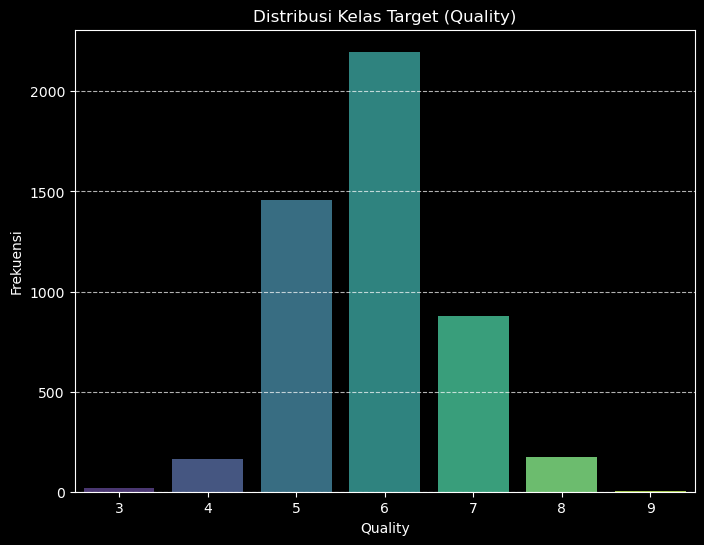

In [16]:
# Mengecek distribusi target
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data, palette='viridis')
plt.title('Distribusi Kelas Target (Quality)')
plt.xlabel('Quality')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


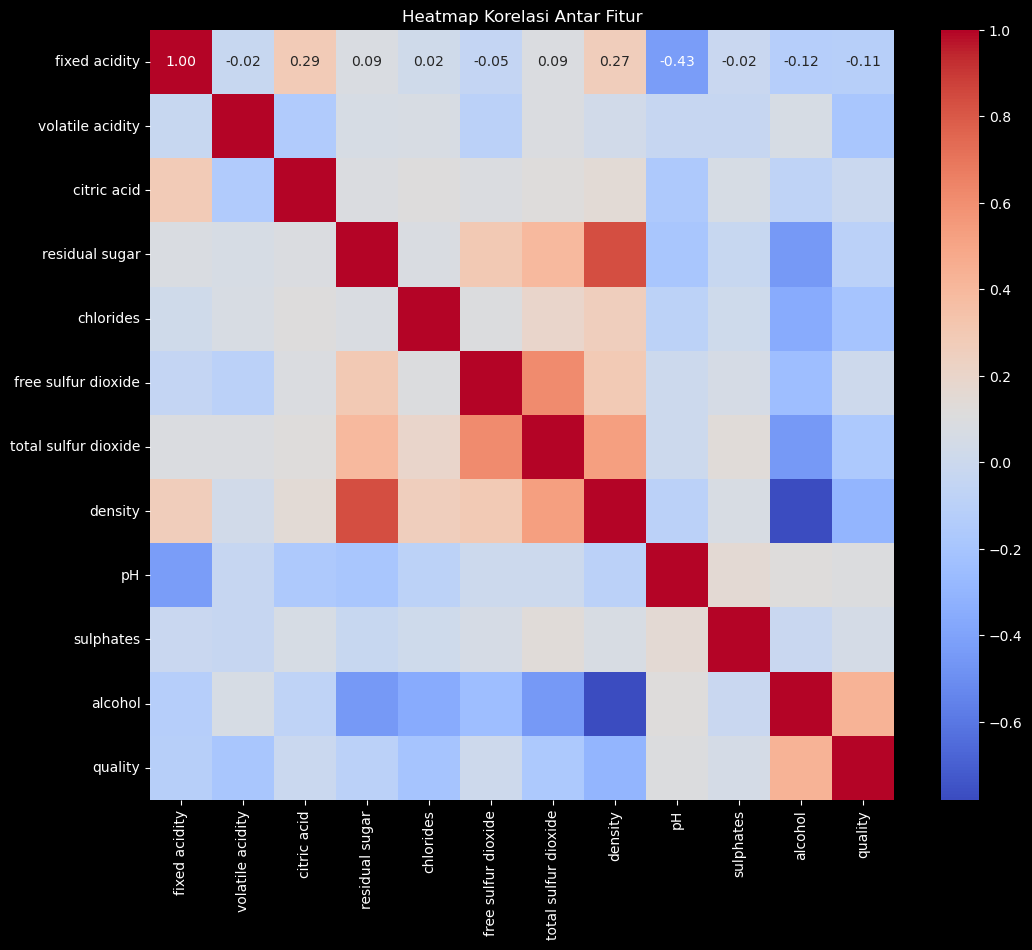

In [17]:
# Heatmap korelasi fitur
plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()


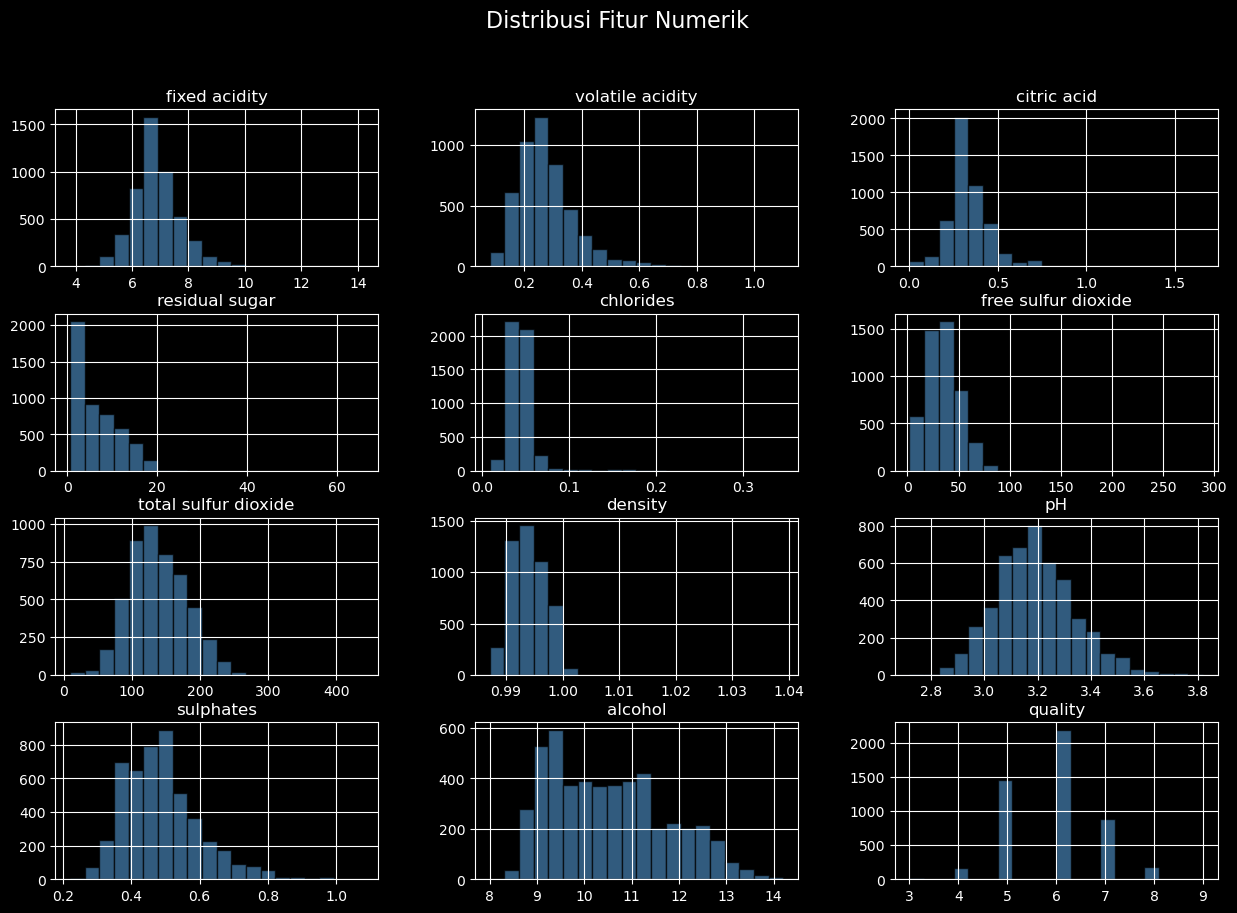

In [18]:
# Distribusi fitur numerik
data.hist(bins=20, figsize=(15, 10), color='steelblue', edgecolor='black', alpha=0.7)
plt.suptitle('Distribusi Fitur Numerik', fontsize=16)
plt.show()

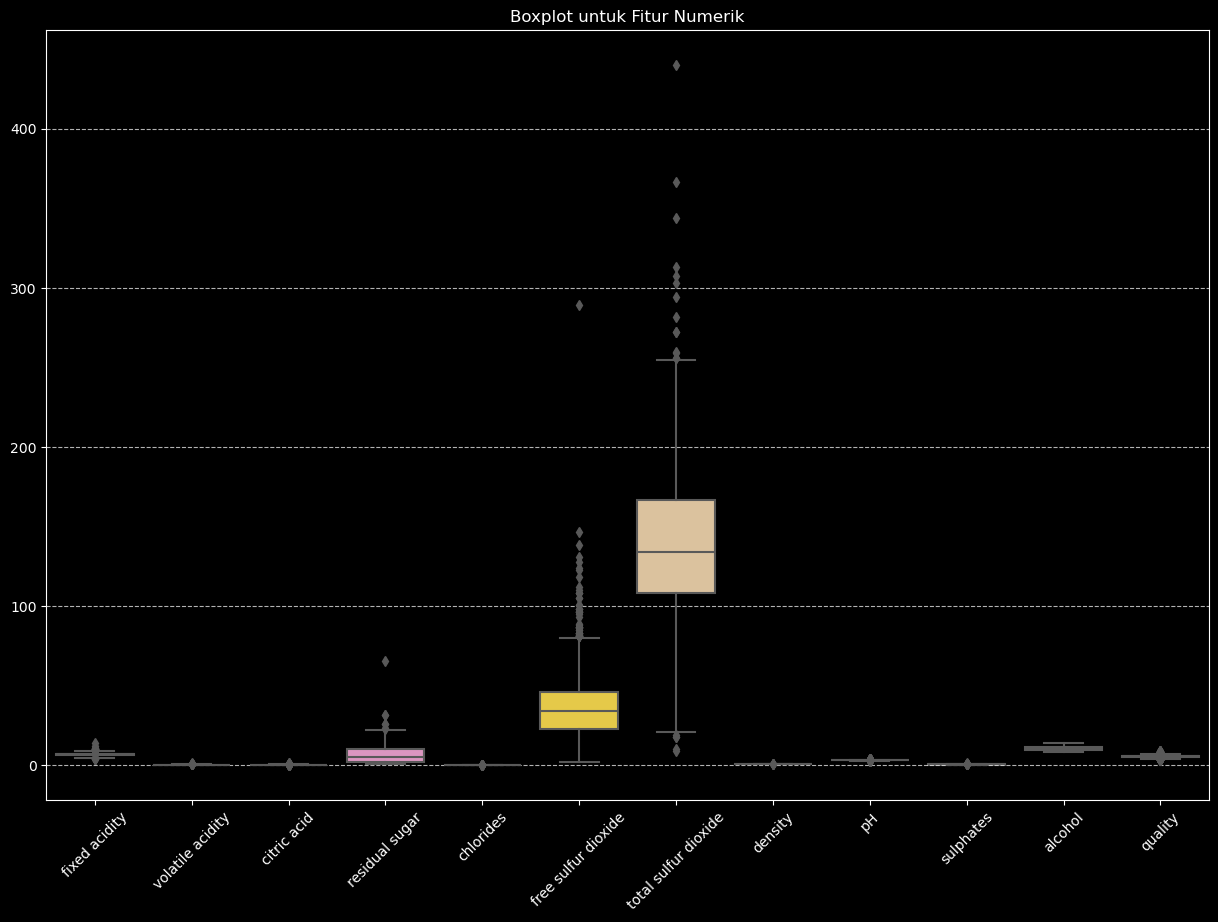

In [19]:
# Boxplot untuk mendeteksi outlier pada fitur numerik
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, palette='Set2')
plt.title('Boxplot untuk Fitur Numerik')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
# 2. Preprocessing dataset
scaler = StandardScaler()  # Standarisasi fitur agar berada pada skala yang sama
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi set latih dan set uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Konversi dataset ke tensor PyTorch dan pindahkan ke perangkat GPU jika tersedia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).to(device)  # Target untuk klasifikasi harus tipe Long
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).to(device)

In [21]:
# 3. Definisi Model MLP
class MLPClassification(nn.Module):
    def __init__(self, input_size, hidden_layers, hidden_neurons, activation):
        super(MLPClassification, self).__init__()
        layers = []
        for i in range(hidden_layers):
            if i == 0:
                layers.append(nn.Linear(input_size, hidden_neurons))  # Hidden layer pertama
            else:
                layers.append(nn.Linear(hidden_neurons, hidden_neurons))  # Hidden layer selanjutnya
            layers.append(activation)  # Activation function
        layers.append(nn.Linear(hidden_neurons, len(np.unique(y))))  # Output layer (jumlah kelas)
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)


In [22]:
# 4. Kombinasi Parameter untuk Eksperimen
hidden_layers_list = [1, 2, 3]  # Jumlah hidden layer
hidden_neurons_list = [4, 8, 16, 32]  # Jumlah neuron per layer
activation_functions = {
    "linear": nn.Identity(),
    "sigmoid": nn.Sigmoid(),
    "relu": nn.ReLU(),
    "tanh": nn.Tanh()
}
epochs_list = [1, 10, 25, 50, 100, 250]  # Jumlah epoch
learning_rates = [10, 1, 0.1, 0.01, 0.0001]  # Learning rate
batch_sizes = [16, 64, 128, 256]  # Ukuran batch

# Menyimpan hasil eksperimen
results = []

In [24]:
total_experiments = len(hidden_layers_list) * len(hidden_neurons_list) * len(activation_functions) * len(epochs_list) * len(learning_rates) * len(batch_sizes)
current_experiment = 0

for hidden_layers in hidden_layers_list:
    for hidden_neurons in hidden_neurons_list:
        for activation_name, activation_fn in activation_functions.items():
            for epochs in epochs_list:
                for lr in learning_rates:
                    for batch_size in batch_sizes:
                        current_experiment += 1
                        
                        # Membuat model dengan parameter tertentu
                        model = MLPClassification(X_train.shape[1], hidden_layers, hidden_neurons, activation_fn).to(device)
                        
                        # Definisi loss function dan optimizer
                        criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss untuk klasifikasi
                        optimizer = optim.SGD(model.parameters(), lr=lr)  # Stochastic Gradient Descent

                        # Training loop
                        model.train()  # Set model ke mode training
                        for epoch in range(epochs):
                            permutation = torch.randperm(X_train.size(0))  # Shuffle data
                            for i in range(0, X_train.size(0), batch_size):
                                indices = permutation[i:i+batch_size]
                                batch_x, batch_y = X_train[indices], y_train[indices]

                                optimizer.zero_grad()  # Reset gradient
                                outputs = model(batch_x)  # Forward pass
                                loss = criterion(outputs, batch_y)  # Menghitung loss
                                loss.backward()  # Backward pass
                                optimizer.step()  # Update weights

                        # Evaluasi model pada data uji
                        model.eval()  # Set model ke mode evaluasi
                        with torch.no_grad():
                            y_pred = model(X_test).argmax(dim=1).cpu().numpy()  # Prediksi kelas
                            acc = accuracy_score(y_test.cpu().numpy(), y_pred)  # Menghitung akurasi

                        # Menyimpan hasil eksperimen
                        results.append({
                            "Hidden Layers": hidden_layers,
                            "Hidden Neurons": hidden_neurons,
                            "Activation Function": activation_name,
                            "Epochs": epochs,
                            "Learning Rate": lr,
                            "Batch Size": batch_size,
                            "Accuracy": acc
                        })

                        # Cetak progres
                        print(f"Progress: {current_experiment}/{total_experiments} experiments completed.")

# Konversi hasil eksperimen ke DataFrame
results_df = pd.DataFrame(results)


Progress: 1/5760 experiments completed.
Progress: 2/5760 experiments completed.
Progress: 3/5760 experiments completed.
Progress: 4/5760 experiments completed.
Progress: 5/5760 experiments completed.
Progress: 6/5760 experiments completed.
Progress: 7/5760 experiments completed.
Progress: 8/5760 experiments completed.
Progress: 9/5760 experiments completed.
Progress: 10/5760 experiments completed.
Progress: 11/5760 experiments completed.
Progress: 12/5760 experiments completed.
Progress: 13/5760 experiments completed.
Progress: 14/5760 experiments completed.
Progress: 15/5760 experiments completed.
Progress: 16/5760 experiments completed.
Progress: 17/5760 experiments completed.
Progress: 18/5760 experiments completed.
Progress: 19/5760 experiments completed.
Progress: 20/5760 experiments completed.
Progress: 21/5760 experiments completed.
Progress: 22/5760 experiments completed.
Progress: 23/5760 experiments completed.
Progress: 24/5760 experiments completed.
Progress: 25/5760 experim

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


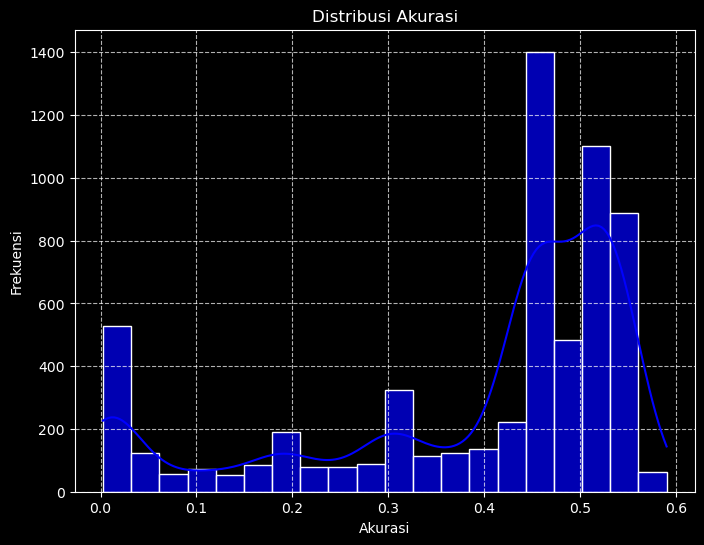

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12828\3317324449.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Activation Function', y='Accuracy', data=results_df, ci=None, estimator=np.mean)


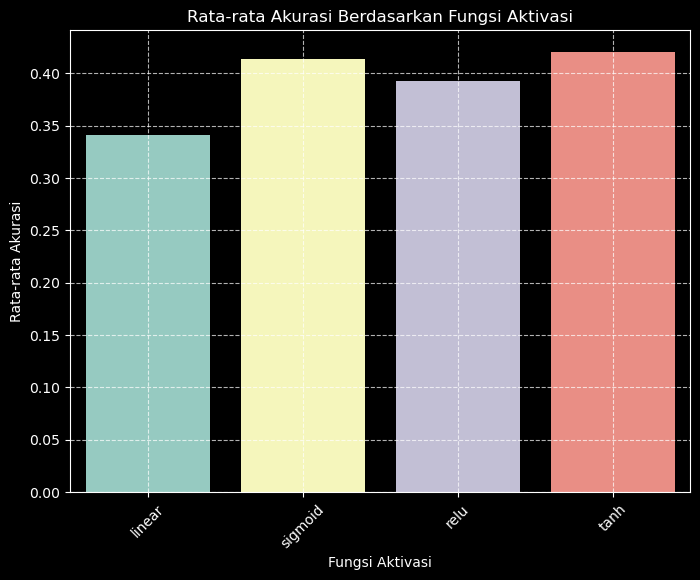

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12828\3317324449.py:23: FutureWarning: The provided callable <function mean at 0x000001731FA04AE0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = results_df.pivot_table(values='Accuracy', index='Hidden Layers', columns='Learning Rate', aggfunc=np.mean)


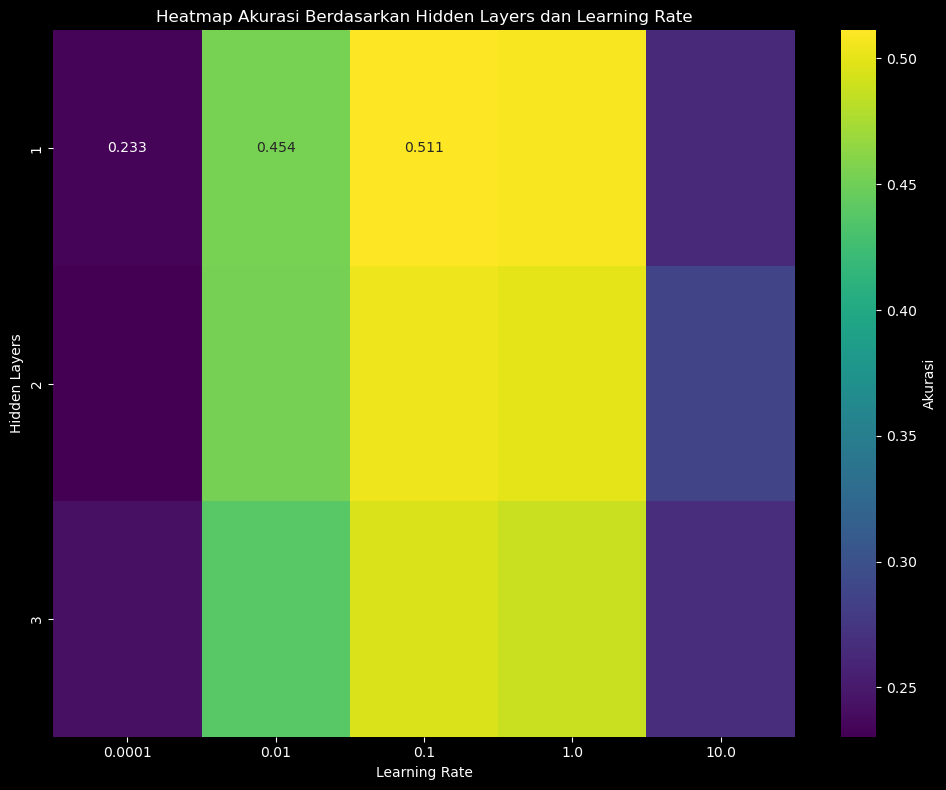

In [26]:
# Menampilkan hasil eksperimen
def visualize_results(results_df):
    # Visualisasi 1: Distribusi akurasi
    plt.figure(figsize=(8, 6))
    sns.histplot(results_df['Accuracy'], kde=True, bins=20, color='blue', alpha=0.7)
    plt.title('Distribusi Akurasi')
    plt.xlabel('Akurasi')
    plt.ylabel('Frekuensi')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Visualisasi 2: Rata-rata akurasi per fungsi aktivasi
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Activation Function', y='Accuracy', data=results_df, ci=None, estimator=np.mean)
    plt.title('Rata-rata Akurasi Berdasarkan Fungsi Aktivasi')
    plt.xlabel('Fungsi Aktivasi')
    plt.ylabel('Rata-rata Akurasi')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # Visualisasi 3: Heatmap kombinasi Hidden Layers dan Learning Rate terhadap Akurasi
    pivot_table = results_df.pivot_table(values='Accuracy', index='Hidden Layers', columns='Learning Rate', aggfunc=np.mean)
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='viridis', cbar_kws={'label': 'Akurasi'})
    plt.title('Heatmap Akurasi Berdasarkan Hidden Layers dan Learning Rate')
    plt.xlabel('Learning Rate')
    plt.ylabel('Hidden Layers')
    plt.tight_layout()
    plt.show()

visualize_results(results_df)
